In [1]:
#PyTorch libraries
import torch
import torch.nn as nn
import torch.optim as optim

#Other libraries
import numpy as np
from matplotlib import pyplot as plt

#Custom python files
from model import LSTM_baseline
from dataloader import *

In [2]:
num_epochs = 500
total_num_games = 1000
p_val=0.1
p_test=0.2
learning_rate = 0.01
batch_size = 20

input_dim = 32
hidden_dim = 70
output_dim = 1

train_loader, val_loader, test_loader = split_dataloader(batch_size=batch_size, total_num_games=total_num_games, 
                                                         p_val=p_val, p_test=p_test)

model = LSTM_baseline(input_dim, hidden_dim, output_dim,batch_size=batch_size)

In [5]:
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [6]:
ave_train_loss = []
ave_val_loss = []

for epoch in range(num_epochs):
    
    total_loss = 0
    total_val_loss = 0
    
    train_count = 0
    for batch in train_loader:
        sequences, labels = batch["features"].to(model.device), batch["labels"].to(model.device)
        train_count += 1
        
        model.hidden_cell = model.init_hidden()
        model.zero_grad()
        
        outputs = model(sequences)
        loss = loss_function(outputs.squeeze(), labels)
        
        loss.backward()
        optimizer.step()
        
        total_loss += loss
        
        
    val_count = 0
    with torch.no_grad():
        for batch in val_loader:
            sequences, labels = batch["features"].to(model.device), batch["labels"].to(model.device)
            val_count += 1
            
            outputs = model(sequences)
            loss = loss_function(outputs.squeeze(), labels)
            
            total_val_loss += loss
    
    ave_train_loss.append(total_loss/train_count)
    ave_val_loss.append(total_val_loss/val_count)
    
    print("Epoch %d finished. Train loss: %f. Validation loss: %f" % 
         (epoch+1, ave_train_loss[-1], ave_val_loss[-1]))

Epoch 1 finished. Train loss: 0.059871. Validation loss: 0.041636


KeyboardInterrupt: 

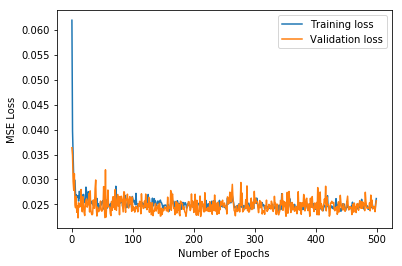

In [8]:
plt.figure(0)
plt.plot(ave_train_loss, label='Training loss')
plt.plot(ave_val_loss, label='Validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [9]:
torch.save(model, './model_exp_decay.pt')